Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


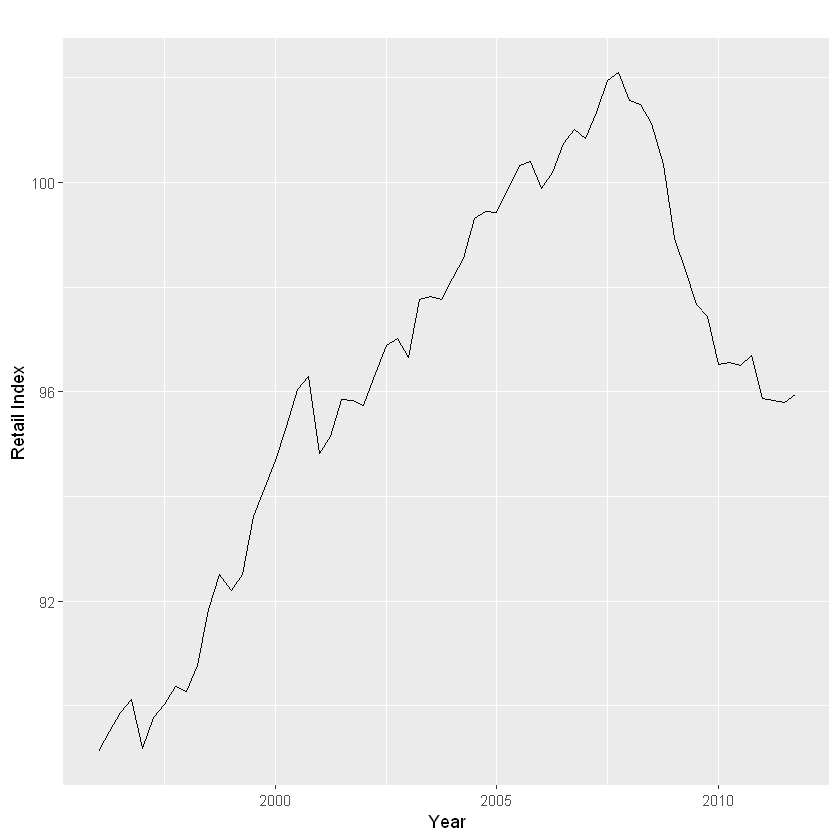

In [1]:
library(fpp2)
library(forecast)

autoplot(euretail)+ ylab("Retail Index")+ xlab("Year")

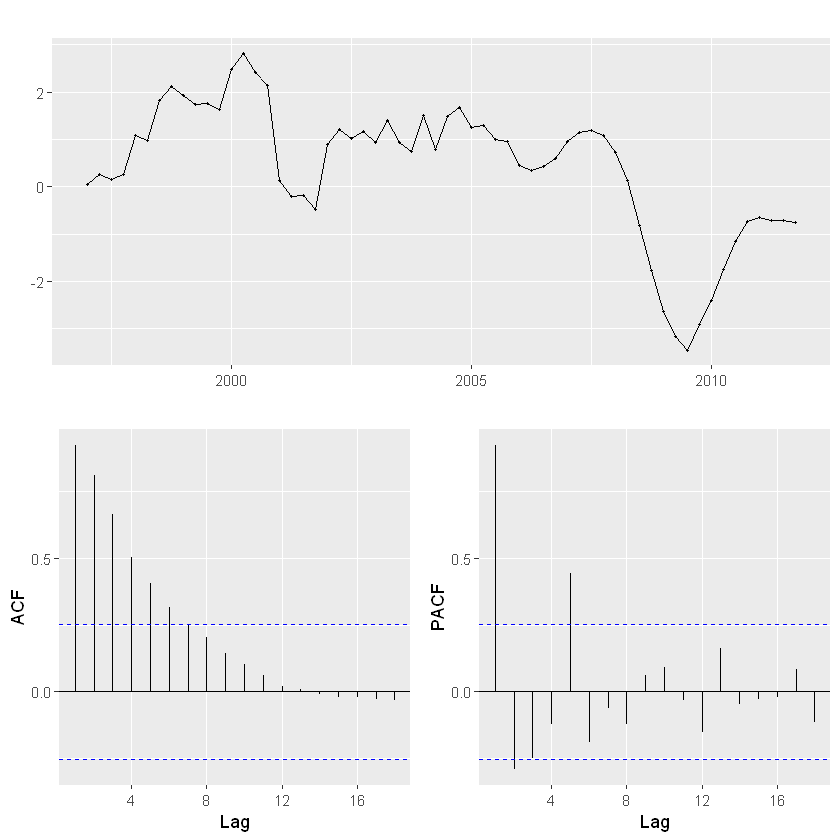

In [2]:
ggtsdisplay(diff(euretail, lag=4))  # 계절차분

추세가 확인됩니다. 눈으로 보고 판단하기 어렵다면 검정통계를 사용하세요!

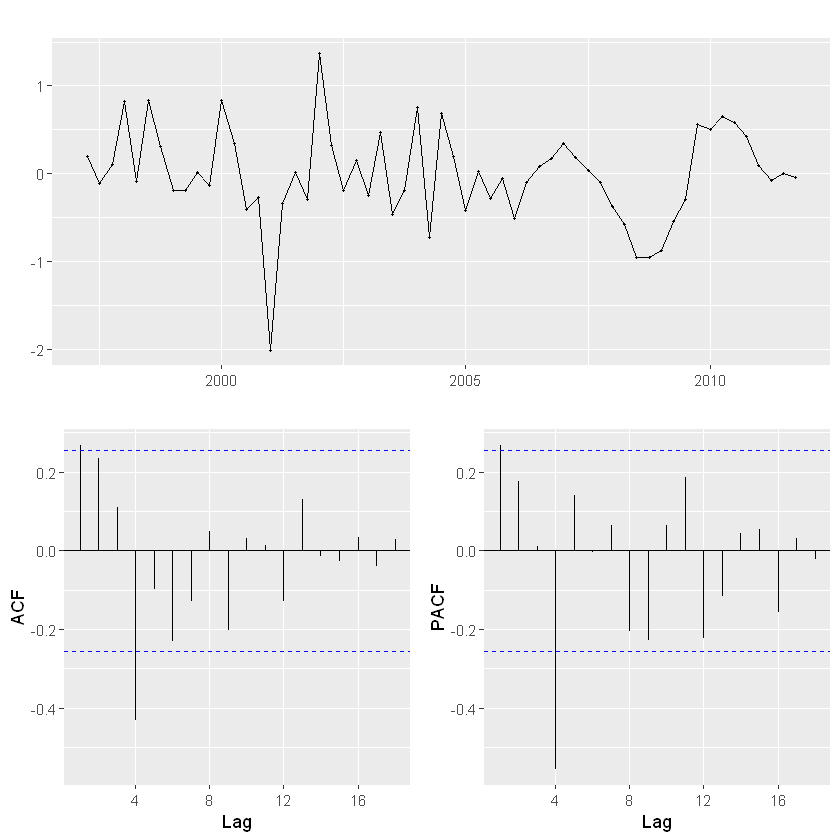

In [3]:
ggtsdisplay(diff(diff(euretail, lag=4)))  # 추세가 보여서 차분한번더

평균이 안정화되었음을 확인할 수 있습니다.<br/>

실제로 ACF와 PACF를 보면 설명한 것과 같이 lag 값에 맞춰서 튀는 값이 확인되게 됩니다.<br/>
구축 가능한 모형은<br/>
* ARIMA(0,1,1)(0,1,1)4
* ARIMA(0,1,2)(0,1,1)4
* ARIMA(0,1,3)(0,1,1)4
* ARIMA(0,1,4)(0,1,1)4
* ARIMA(1,1,0)(1,1,0)4
* ARIMA(2,1,0)(1,1,0)4
* ARIMA(3,1,0)(1,1,0)4
* ARIMA(1,1,1)(1,1,1)4

등이 있습니다.<br/>
가운데만 고정되었고 양옆 파라메터를 바꿔가면서 다 테스트해보고 AICc나 RMSE 값을 비교해서 가장 좋은 모형을 찾으면 되겠습니다.<br/>

이 실습에서는 AICc 값을 기준으로 비교해보겠습니다.<br/>


Series: euretail 
ARIMA(0,1,1)(0,1,1)[4] 

Coefficients:
         ma1     sma1
      0.2903  -0.6913
s.e.  0.1118   0.1193

sigma^2 estimated as 0.188:  log likelihood=-34.64
AIC=75.28   AICc=75.72   BIC=81.51

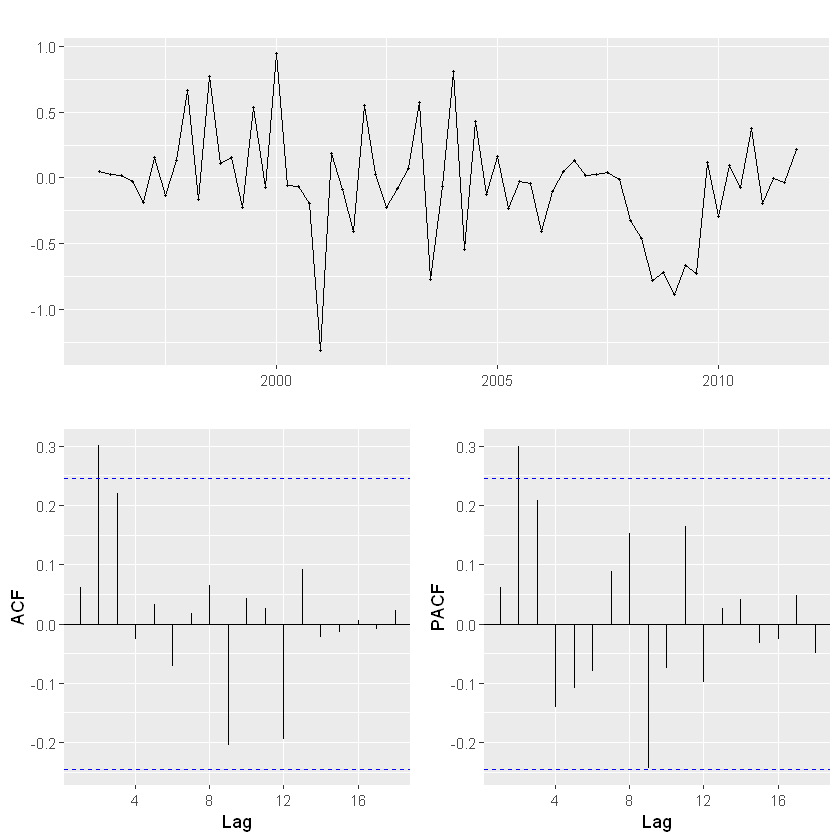


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[4]
Q* = 10.654, df = 6, p-value = 0.09968

Model df: 2.   Total lags used: 8



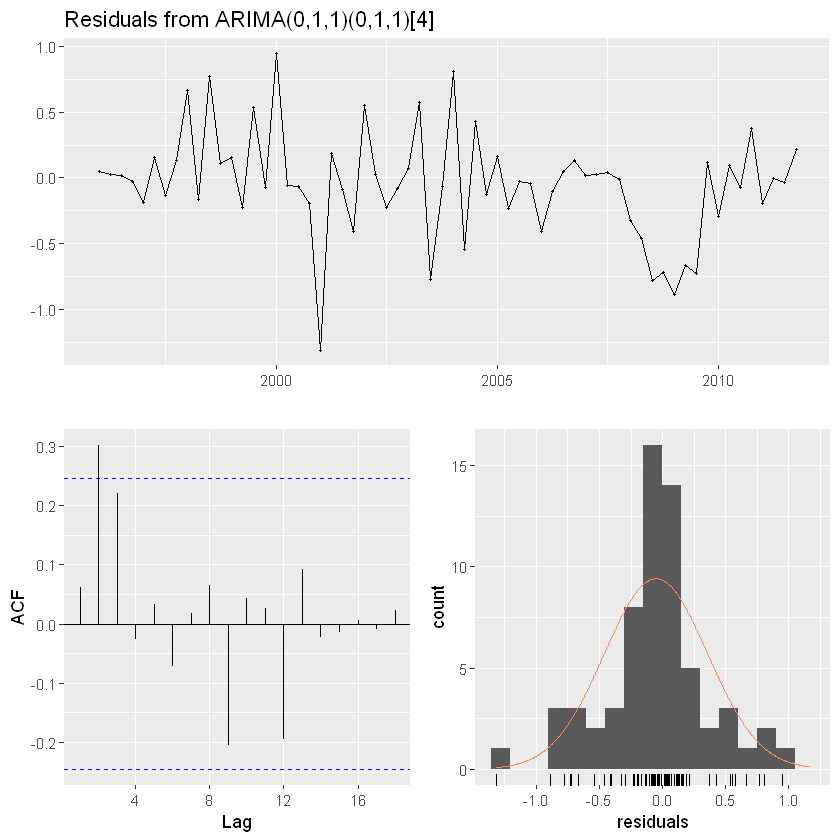

In [4]:
library(ggplot2)

sArima_1_fit_1 <- Arima(euretail, order=c(0,1,1), seasonal=c(0,1,1))
sArima_1_fit_1
ggtsdisplay(residuals(sArima_1_fit_1))
checkresiduals(sArima_1_fit_1)

Series: euretail 
ARIMA(0,1,2)(0,1,1)[4] 

Coefficients:
         ma1     ma2     sma1
      0.2303  0.2502  -0.6991
s.e.  0.1484  0.1188   0.1284

sigma^2 estimated as 0.1789:  log likelihood=-32.76
AIC=73.53   AICc=74.27   BIC=81.84

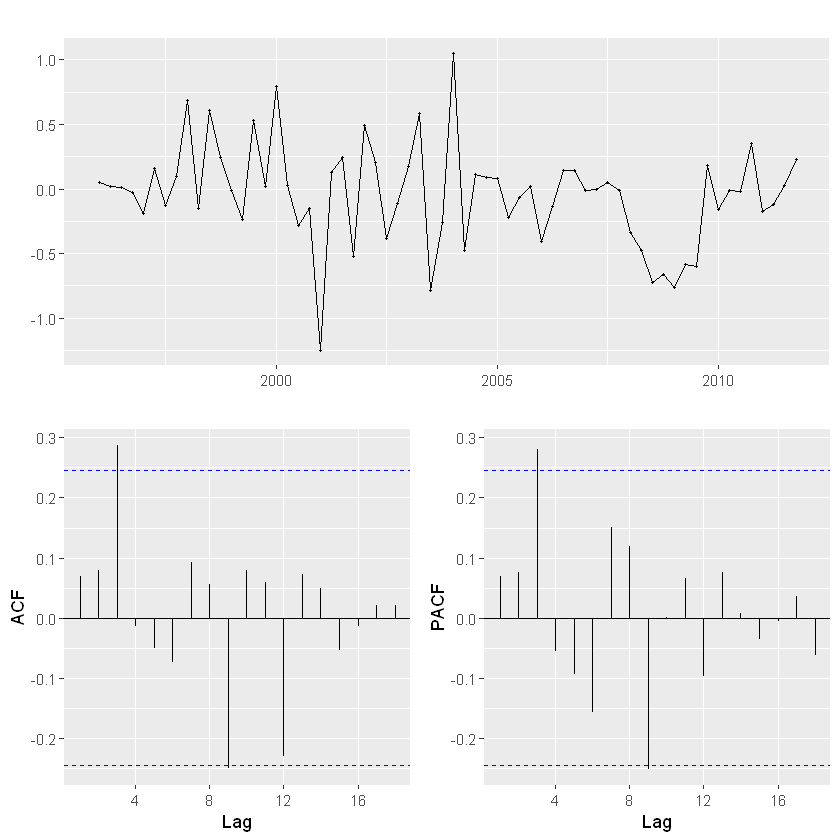


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,1,1)[4]
Q* = 7.946, df = 5, p-value = 0.1592

Model df: 3.   Total lags used: 8



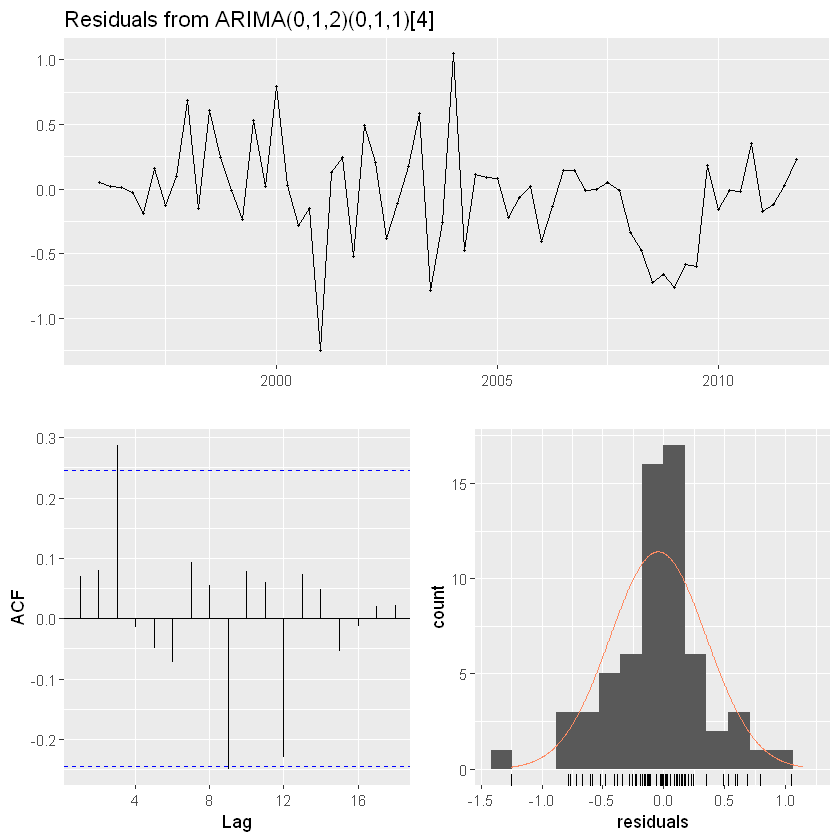

In [5]:
sArima_1_fit_2 <-Arima(euretail, order = c(0,1,2), seasonal = c(0,1,1))
sArima_1_fit_2
ggtsdisplay(residuals(sArima_1_fit_2))
checkresiduals(sArima_1_fit_2)

Series: euretail 
ARIMA(0,1,3)(0,1,1)[4] 

Coefficients:
         ma1     ma2     ma3     sma1
      0.2630  0.3694  0.4200  -0.6636
s.e.  0.1237  0.1255  0.1294   0.1545

sigma^2 estimated as 0.156:  log likelihood=-28.63
AIC=67.26   AICc=68.39   BIC=77.65

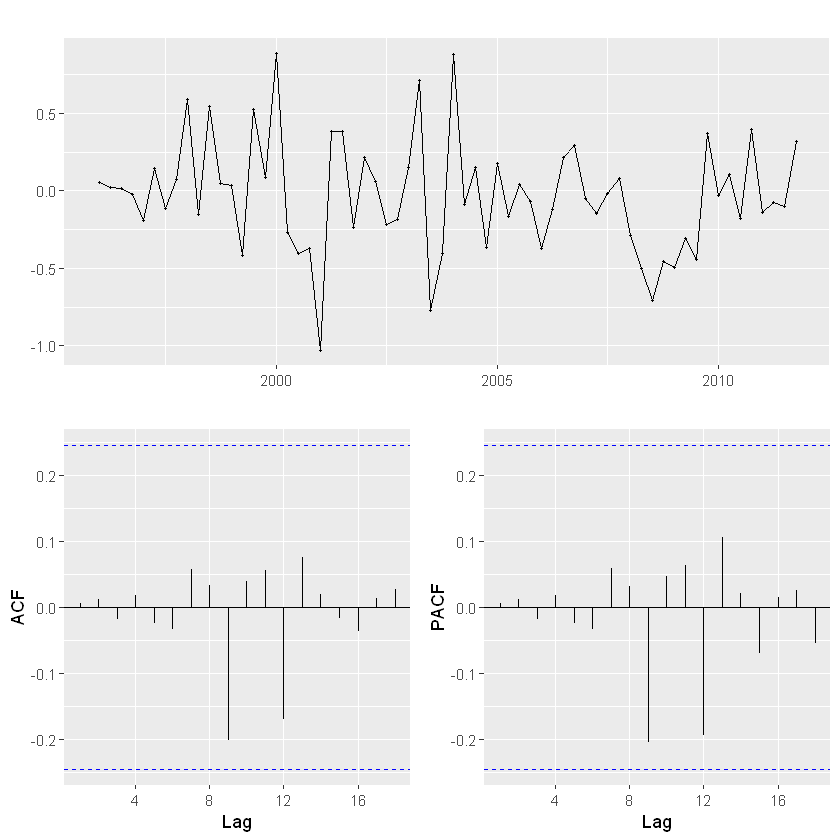


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,1)[4]
Q* = 0.51128, df = 4, p-value = 0.9724

Model df: 4.   Total lags used: 8



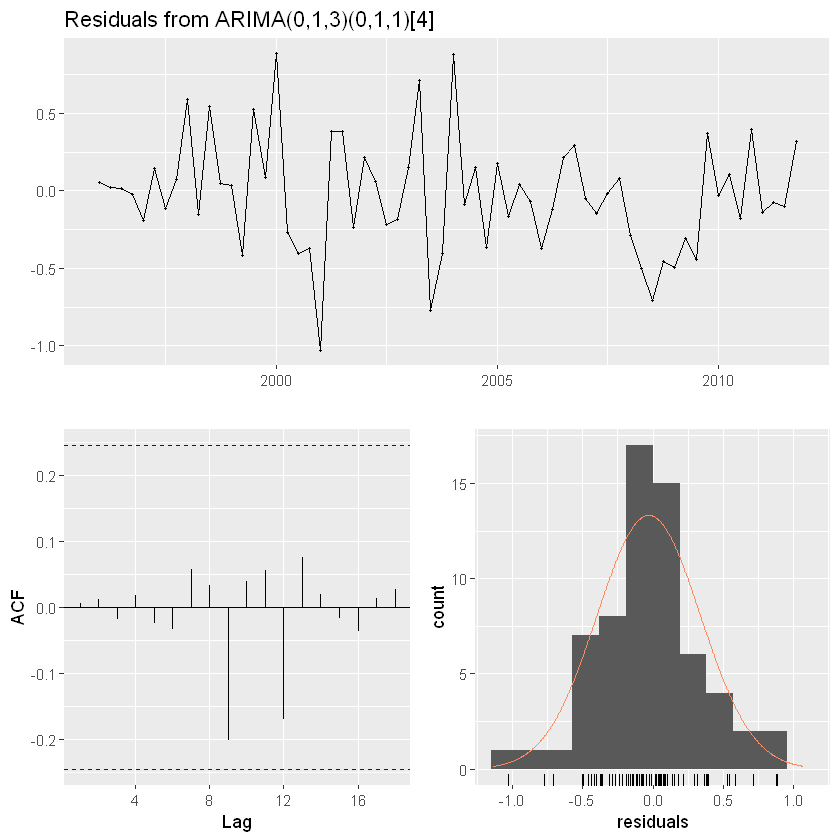

In [6]:
sArima_1_fit_3 <-Arima(euretail, order = c(0,1,3), seasonal = c(0,1,1))
sArima_1_fit_3
ggtsdisplay(residuals(sArima_1_fit_3))
checkresiduals(sArima_1_fit_3)

Series: euretail 
ARIMA(0,1,4)(0,1,1)[4] 

Coefficients:
         ma1     ma2     ma3     ma4     sma1
      0.2781  0.3836  0.4167  0.0697  -0.7203
s.e.  0.1294  0.1353  0.1316  0.1746   0.1945

sigma^2 estimated as 0.158:  log likelihood=-28.56
AIC=69.12   AICc=70.73   BIC=81.58

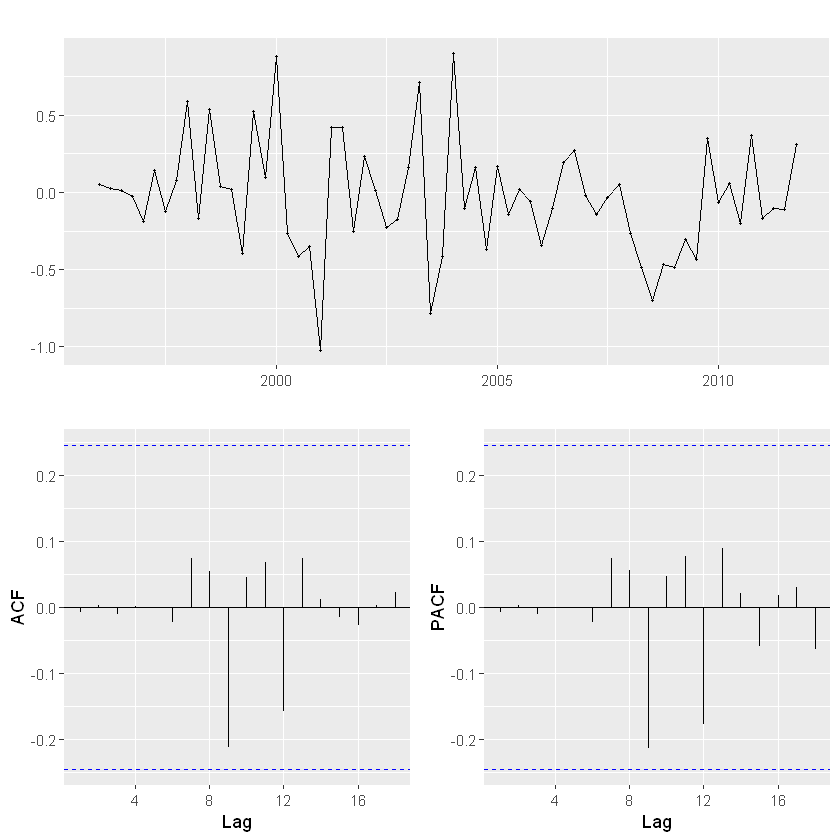


	Ljung-Box test

data:  Residuals from ARIMA(0,1,4)(0,1,1)[4]
Q* = 0.67109, df = 3, p-value = 0.88

Model df: 5.   Total lags used: 8



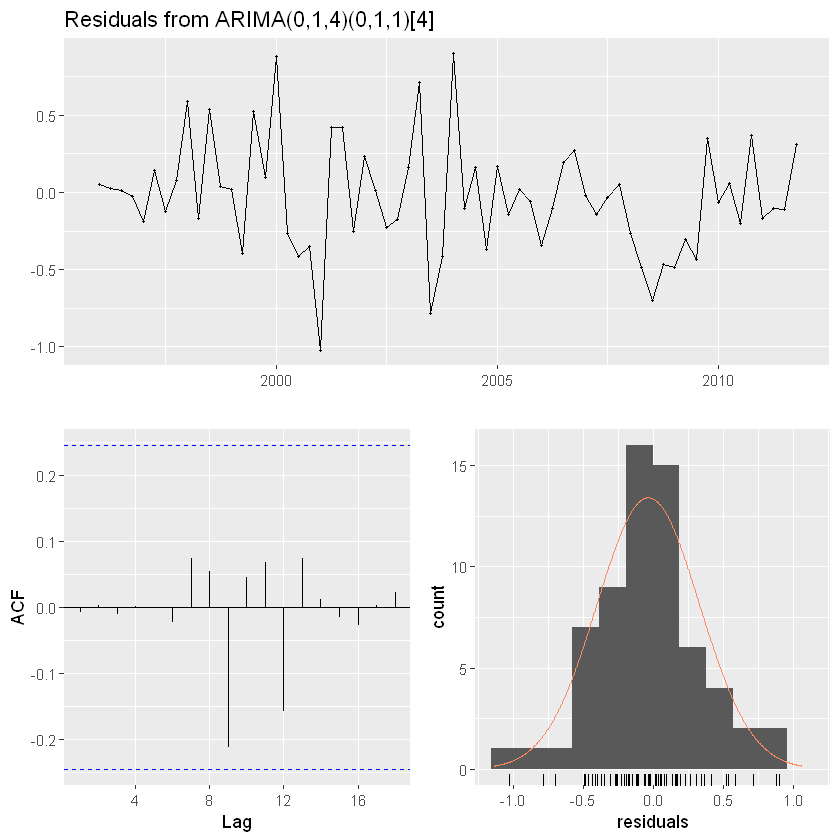

In [7]:
sArima_1_fit_4 <-Arima(euretail, order = c(0,1,4), seasonal = c(0,1,1))
sArima_1_fit_4
ggtsdisplay(residuals(sArima_1_fit_4))
checkresiduals(sArima_1_fit_4)

Series: euretail 
ARIMA(1,1,0)(1,1,0)[4] 

Coefficients:
         ar1     sar1
      0.4224  -0.5297
s.e.  0.1214   0.1095

sigma^2 estimated as 0.1962:  log likelihood=-35.29
AIC=76.57   AICc=77.01   BIC=82.8

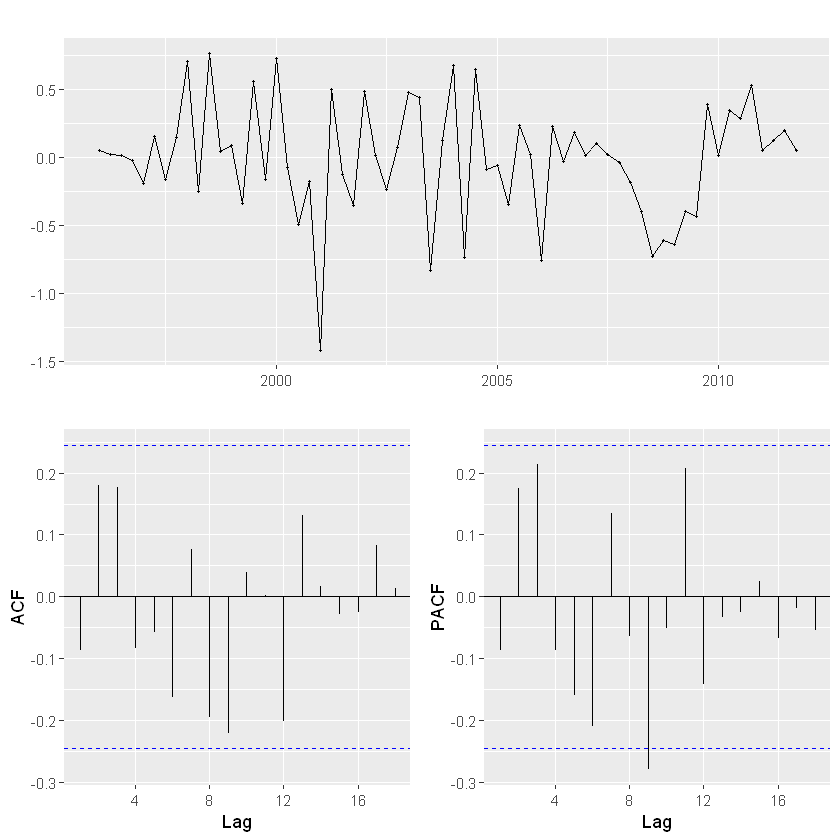


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,1,0)[4]
Q* = 10.827, df = 6, p-value = 0.09387

Model df: 2.   Total lags used: 8



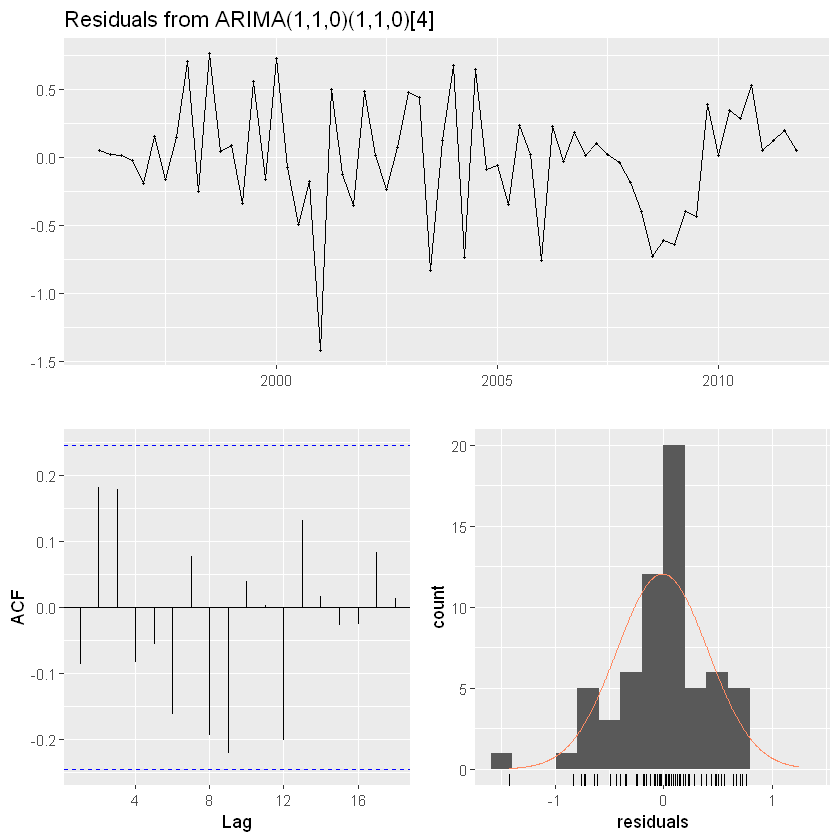

In [9]:
sArima_1_fit_1_ <-Arima(euretail, order = c(1,1,0), seasonal = c(1,1,0))
sArima_1_fit_1_
ggtsdisplay(residuals(sArima_1_fit_1_))
checkresiduals(sArima_1_fit_1_)

Series: euretail 
ARIMA(2,1,0)(1,1,0)[4] 

Coefficients:
         ar1     ar2     sar1
      0.3278  0.2328  -0.5401
s.e.  0.1273  0.1265   0.1065

sigma^2 estimated as 0.1889:  log likelihood=-33.64
AIC=75.28   AICc=76.02   BIC=83.59

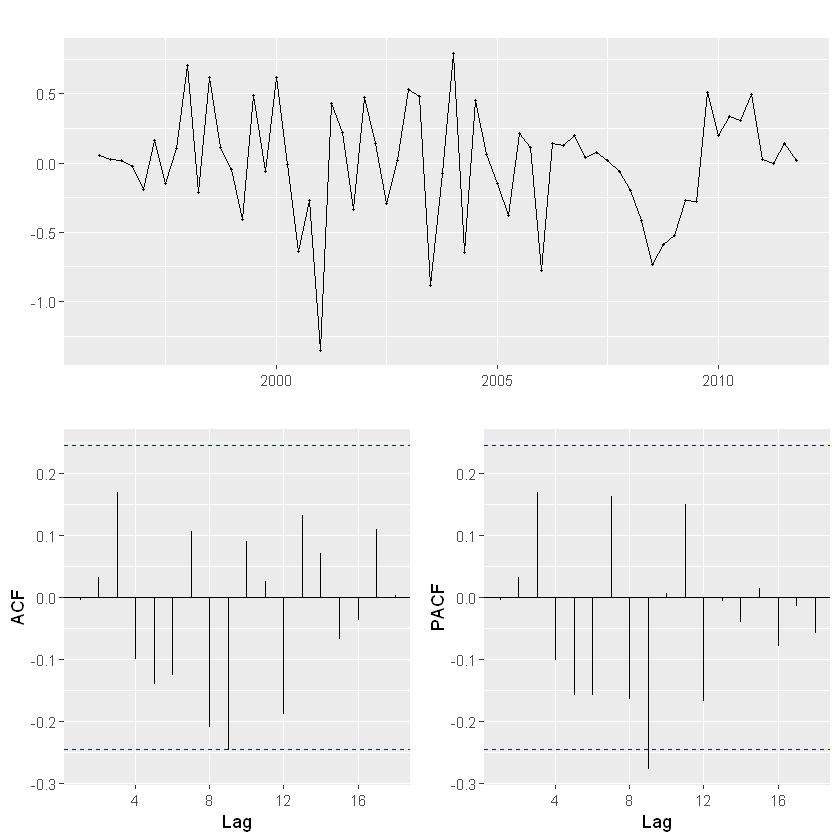


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)(1,1,0)[4]
Q* = 9.4744, df = 5, p-value = 0.09157

Model df: 3.   Total lags used: 8



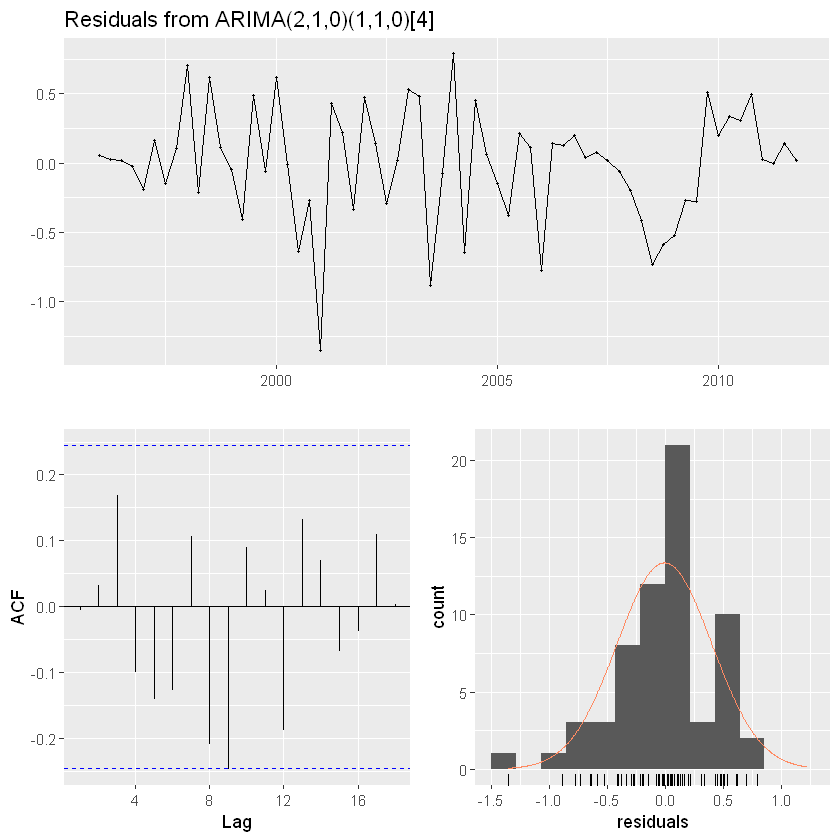

In [10]:
sArima_2_fit_1_ <-Arima(euretail, order = c(2,1,0), seasonal = c(1,1,0))
sArima_2_fit_1_
ggtsdisplay(residuals(sArima_2_fit_1_))
checkresiduals(sArima_2_fit_1_)

Series: euretail 
ARIMA(3,1,0)(1,1,0)[4] 

Coefficients:
         ar1     ar2     ar3     sar1
      0.3159  0.2124  0.0582  -0.5423
s.e.  0.1296  0.1340  0.1275   0.1062

sigma^2 estimated as 0.1917:  log likelihood=-33.54
AIC=77.07   AICc=78.2   BIC=87.46

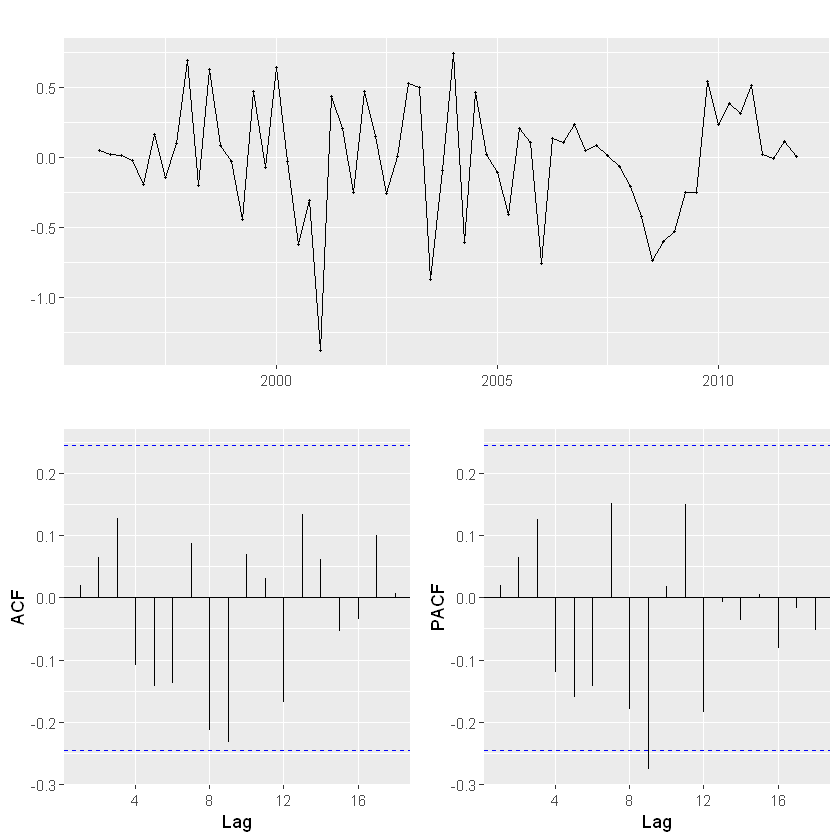


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)(1,1,0)[4]
Q* = 9.1197, df = 4, p-value = 0.05818

Model df: 4.   Total lags used: 8



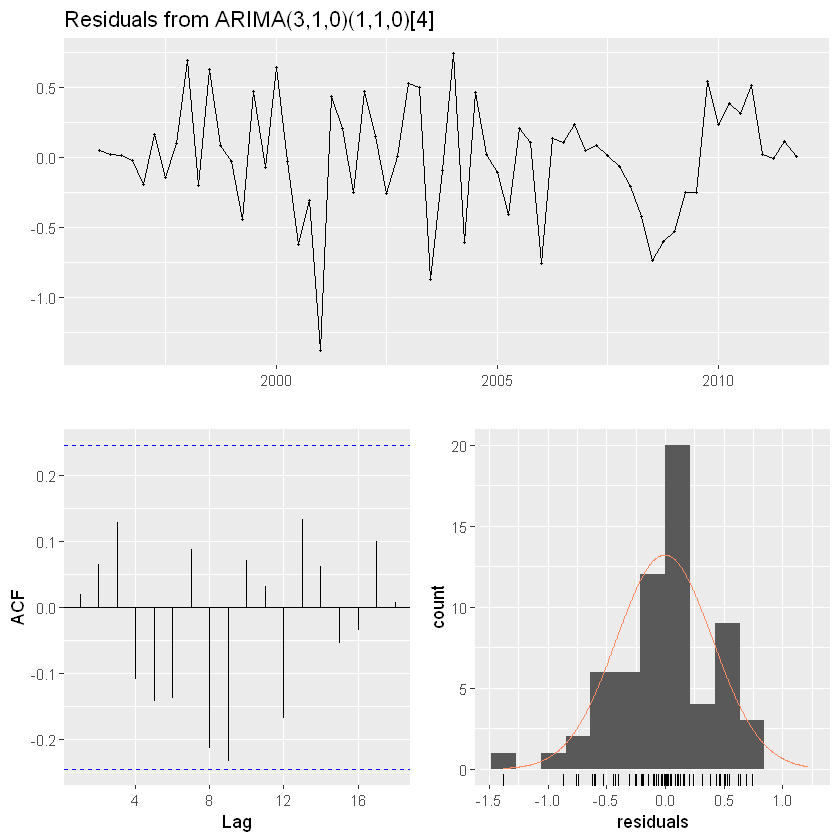

In [11]:
sArima_3_fit_1_ <-Arima(euretail, order = c(3,1,0), seasonal = c(1,1,0))
sArima_3_fit_1_
ggtsdisplay(residuals(sArima_3_fit_1_))
checkresiduals(sArima_3_fit_1_)

Series: euretail 
ARIMA(1,1,1)(1,1,1)[4] 

Coefficients:
         ar1      ma1     sar1     sma1
      0.8836  -0.5202  -0.0286  -0.9389
s.e.  0.1376   0.1715   0.1630   0.3874

sigma^2 estimated as 0.1549:  log likelihood=-30.1
AIC=70.2   AICc=71.33   BIC=80.59

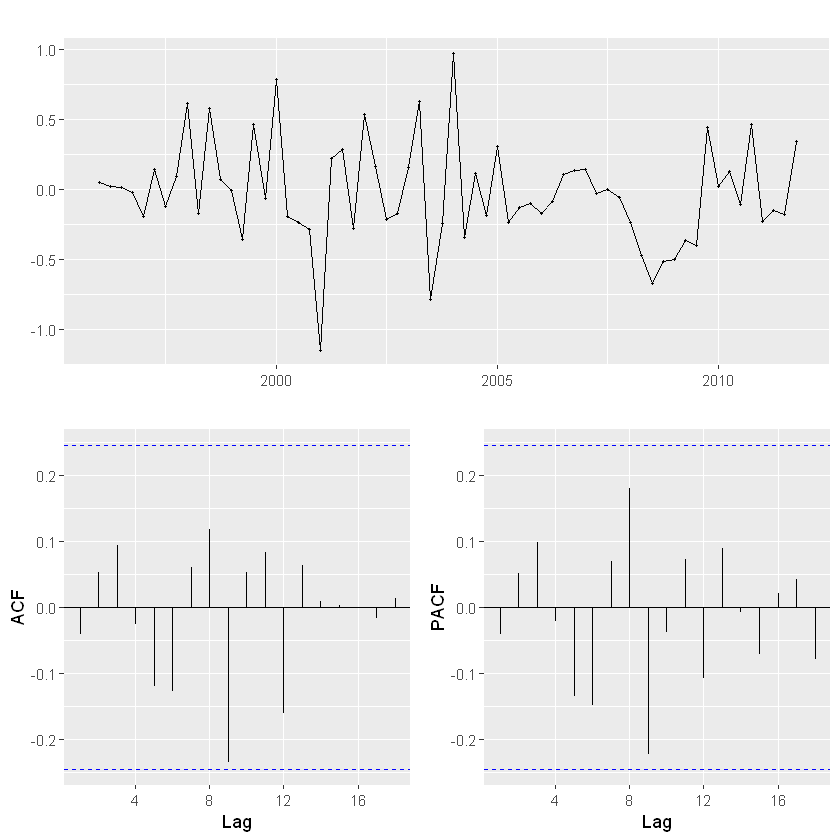


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[4]
Q* = 4.4884, df = 4, p-value = 0.3439

Model df: 4.   Total lags used: 8



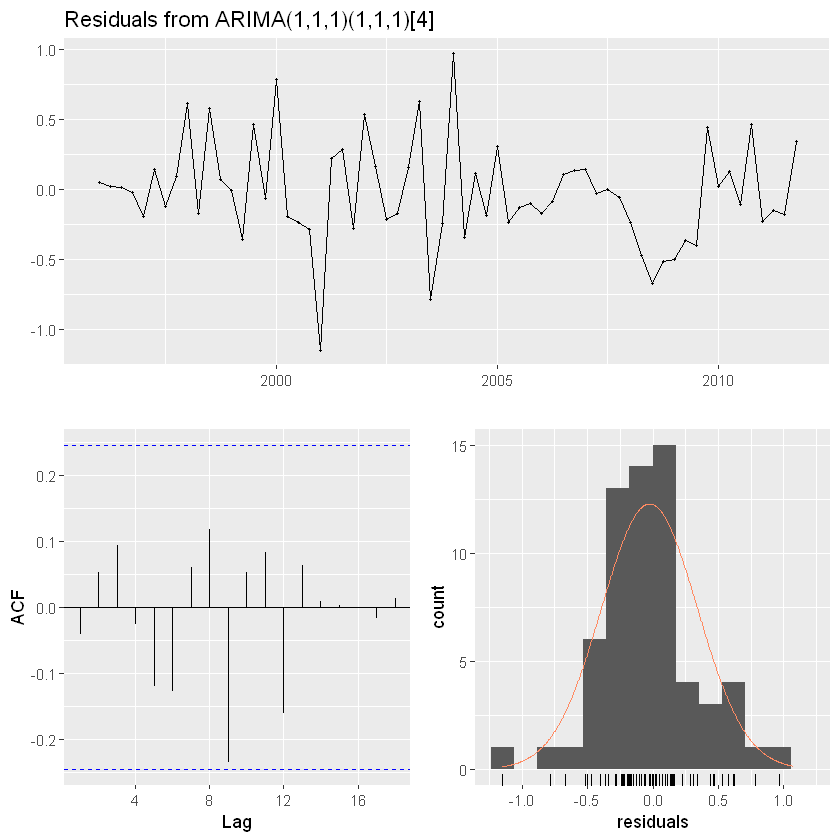

In [12]:
sArima_1_fit_1_1 <-Arima(euretail, order = c(1,1,1), seasonal = c(1,1,1))
sArima_1_fit_1_1
ggtsdisplay(residuals(sArima_1_fit_1_1))
checkresiduals(sArima_1_fit_1_1)

ARIMA(0,1,1)(0,1,1)4의 AICc값은 75.72<br/>
ARIMA(0,1,2)(0,1,1)4의 AICc값은 74.27<br/>
ARIMA(0,1,3)(0,1,1)4의 AICc값은 68.39<br/>
ARIMA(0,1,4)(0,1,1)4의 AICc값은 70.73<br/>
ARIMA(1,1,0)(1,1,0)4의 AICc값은 77.01<br/>
ARIMA(2,1,0)(1,1,0)4의 AICc값은 76.02<br/>
ARIMA(3,1,0)(1,1,0)4의 AICc값은 78.2<br/>
ARIMA(1,1,1)(1,1,1)4의 AICc값은 71.33<br/>

으로 확인되었습니다.<br/>
AICc는 정보손실량을 나타내고 그 값이 작을수록 좋기때문에 세번째 모형인 AIRMA(0,1,3)(0,1,1)이 가장 좋습니다.<br/>
하지만 AICc값은 학습데이터에만 의존적이기 때문에 너무 믿어선 안됩니다.<br/>

차트만 봤을 때 lag값에 맞춰서 튀는 값들은 사실 없었거든요? 그래서 아마도 013,011보다는 111,111이 가장 적합하지 않았을까 싶으므로 상대적으로 input parameter가 적은 모형으로 가져가는게 더 바람직합니다.<br/>

실제로 분석하게 될 경우에는 RMSE값도 함께 고려해서 모형을 선택해야합니다.<br/>
우선 좋다고 나왔으니 AIRMA(0,1,3)(0,1,1) 이 모형으로 적합시켰을 때의 잔차평가를 해보면 백색잡음형태임을 확인할 수 있었습니다.<br/>

예측까지 해보는 과정을 보이도록 하겠습니다.<br/>

        Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
2012 Q1       95.17620 94.67006 95.68233 94.40214  95.95026
2012 Q2       95.23809 94.42273 96.05345 93.99111  96.48507
2012 Q3       95.32444 94.16364 96.48523 93.54915  97.09972
2012 Q4       95.33633 93.77859 96.89408 92.95397  97.71870
2013 Q1       94.56087 92.58895 96.53279 91.54508  97.57666
2013 Q2       94.57178 92.23497 96.90859 90.99794  98.14562
2013 Q3       94.56911 91.88684 97.25138 90.46694  98.67129
2013 Q4       94.58101 91.56075 97.60126 89.96193  99.20009
2014 Q1       93.80554 90.40685 97.20423 88.60769  99.00339
2014 Q2       93.81646 90.05855 97.57436 88.06923  99.56368
2014 Q3       93.81379 89.70303 97.92454 87.52693 100.10064
2014 Q4       93.82568 89.36270 98.28867 87.00014 100.65123

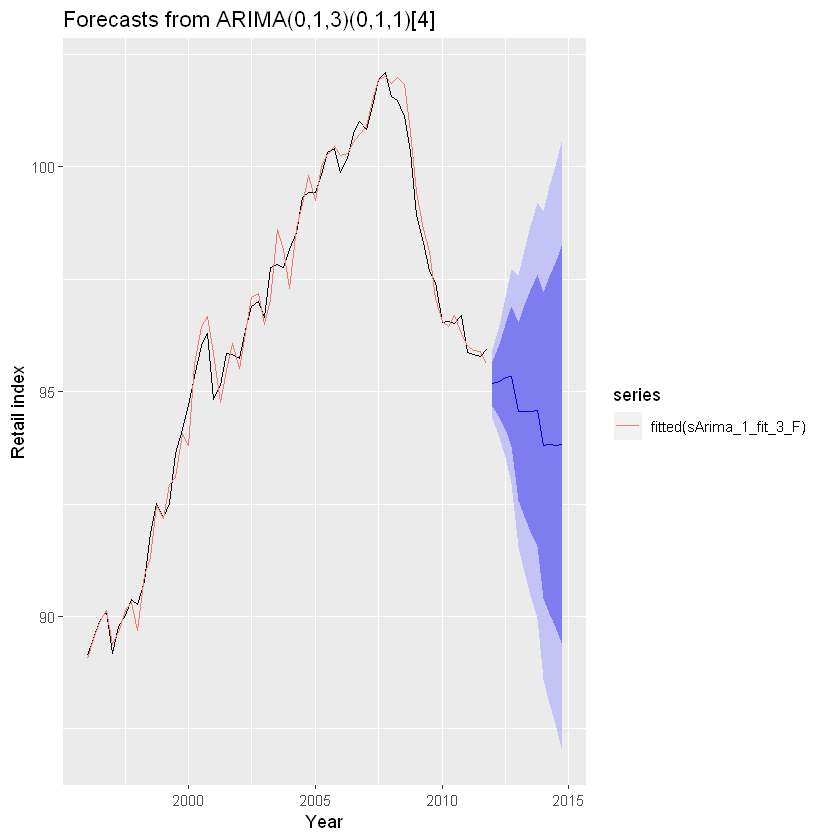

In [13]:
sArima_1_fit_3_F <-forecast(sArima_1_fit_3, h=12)
sArima_1_fit_3_F
autoplot(sArima_1_fit_3_F) + ylab("Retail index") + xlab("Year") + autolayer(fitted(sArima_1_fit_3_F))